### 数据预处理

In [835]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

# 这里的编码类型可以用sublime打开查看左下角
base_train = pd.read_csv('tables/base-train.csv',engine='python',encoding='gb2312')
knowledge_train = pd.read_csv('tables/knowledge-train.csv',engine='python',encoding='utf8')
money_train = pd.read_csv('tables/money-train.csv',engine='python',encoding='utf8')
year_train = pd.read_csv('tables/year-train.csv',engine='python',encoding='gb2312')

    1. base_train表数据处理

In [836]:
# 1.1 查看具体数据与结构
# 看一哈具体数据
base_train.head()

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
0,5986361,2014.0,7090.0,服务业,湖北,有限责任公司,自然人,0.93,0
1,5991749,2007.0,5940.0,零售业,湖南,合伙企业,企业法人,0.57,0
2,5998154,2002.0,9720.0,工业,福建,合伙企业,自然人,0.74,0
3,5984390,2000.0,4800.0,商业服务业,山东,股份有限公司,NaN,0.90,0
4,5980535,2004.0,4530.0,零售业,广东,农民专业合作社,自然人,0.95,0


In [837]:
# 表的结构
base_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28519 entries, 0 to 28518
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       28519 non-null  int64  
 1   注册时间     28230 non-null  float64
 2   注册资本     28220 non-null  float64
 3   行业       28265 non-null  object 
 4   区域       28241 non-null  object 
 5   企业类型     28227 non-null  object 
 6   控制人类型    28226 non-null  object 
 7   控制人持股比例  28223 non-null  float64
 8   flag     28519 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.0+ MB


    1.2 分析数值特征，处理缺失数据
        1.2.1 注册时间
        1.2.2 注册资本
        1.2.3 控制人持股比例
        1.2.4 处理行业缺失值。区域、企业类型、控制人类型都可以同样处理，都替换为未知
        1.2.5 删掉几个不重要的列

In [838]:
# 1.2.1 注册时间
# 注册时间有缺失，有188行缺失，占比比较小
base_train.loc[base_train['注册时间'].isna()]

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
42,5984431,NaN,4280.0,商业服务业,福建,农民专业合作社,自然人,0.61,0
107,5999342,NaN,9320.0,交通运输业,NaN,合伙企业,企业法人,0.96,0
181,5989724,NaN,990.0,商业服务业,江西,农民专业合作社,企业法人,0.57,0
190,5993825,NaN,2790.0,社区服务,福建,集体所有制企业,自然人,0.66,0
250,5995399,NaN,110.0,服务业,湖北,农民专业合作社,企业法人,0.55,0
...,...,...,...,...,...,...,...,...,...
27997,2406538,NaN,6930.0,交通运输业,福建,集体所有制企业,自然人,0.95,1
28150,495971,NaN,1540.0,工业,湖南,有限责任公司,自然人,0.53,1
28274,2005897,NaN,6440.0,社区服务,江西,合伙企业,企业法人,0.73,1
28309,1938470,NaN,1540.0,交通运输业,山东,集体所有制企业,企业法人,0.96,1


In [839]:
# 删除这些行即可
base_train.dropna(subset=['注册时间'],inplace=True)

In [840]:
# 虽然有缺失，但是不能直接删除这个列，而是计算一下公司的营业年份，用2017减去。首先要删除注册时间有缺失的行
注册时间 = base_train['注册时间'].apply(lambda x:2017-x)
base_train['注册时间']=注册时间

In [841]:
# 1.2.2 注册资本

base_train.loc[base_train['注册资本'].isna()]

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
9,5980529,7.0,NaN,工业,广西,合伙企业,自然人,0.52,0
225,5979358,17.0,NaN,服务业,广东,股份有限公司,自然人,0.53,0
337,5983458,13.0,NaN,工业,湖南,有限责任公司,自然人,0.91,0
378,5999024,5.0,NaN,商业服务业,江西,有限责任公司,自然人,0.70,0
402,5992211,10.0,NaN,服务业,江西,合伙企业,自然人,0.69,0
...,...,...,...,...,...,...,...,...,...
28261,706957,11.0,NaN,零售业,江西,合伙企业,企业法人,0.68,1
28293,116880,11.0,NaN,社区服务,湖南,合伙企业,企业法人,0.92,1
28334,2690706,7.0,NaN,零售业,福建,合伙企业,企业法人,0.56,1
28352,2341520,3.0,NaN,服务业,福建,有限责任公司,自然人,0.91,1


c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='注册资本', ylabel='Density'>

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36164 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27880 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs

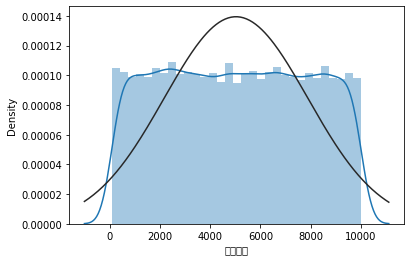

In [842]:
# 注册资本的分布
sns.distplot(base_train['注册资本'],fit=st.norm)

In [843]:
# 直接平均值填充
mean = base_train['注册资本'].mean()
base_train['注册资本'].fillna(mean,inplace=True)

In [844]:
# 1.2.3 控制人持股比例
base_train.loc[base_train['控制人持股比例'].isna()]

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
193,5981372,7.0,4840.0,零售业,湖北,合伙企业,NaN,NaN,0
213,5987510,7.0,3270.0,社区服务,湖北,农民专业合作社,自然人,NaN,0
421,5995874,15.0,6850.0,商业服务业,湖南,有限责任公司,自然人,NaN,0
466,5993031,4.0,9990.0,服务业,江西,有限责任公司,企业法人,NaN,0
490,5992933,12.0,3860.0,服务业,广东,合伙企业,企业法人,NaN,0
...,...,...,...,...,...,...,...,...,...
28431,3249650,17.0,3570.0,商业服务业,山东,农民专业合作社,企业法人,NaN,1
28435,2085215,5.0,1180.0,工业,山东,有限责任公司,自然人,NaN,1
28469,1609359,8.0,500.0,服务业,湖南,集体所有制企业,自然人,NaN,1
28476,1832615,5.0,1310.0,零售业,广西,集体所有制企业,企业法人,NaN,1


c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='控制人持股比例', ylabel='Density'>

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21046 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\rikoo\dev\env\anaconda3\en

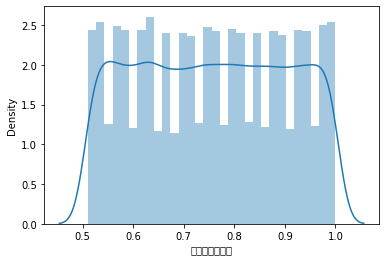

In [845]:
sns.distplot(base_train['控制人持股比例'])

In [846]:
# 将缺失值替换为平均值
base_train['控制人持股比例'].fillna(base_train['控制人持股比例'].mean(),inplace=True)



# 1.2.4 处理行业缺失值。区域、企业类型、控制人类型都可以同样处理，都替换为未知

In [847]:
base_train['行业'].fillna('未知',inplace=True)

In [848]:
# 其他缺失值也这样处理
base_train['区域'].fillna('未知',inplace=True)

In [849]:
base_train['企业类型'].fillna('未知',inplace=True)

In [850]:
base_train['控制人类型'].fillna('未知',inplace=True)

In [851]:
map_industry = {'零售业':1,'服务业':2,'工业':3,'商业服务业':4,'社区服务':5,'交通运输业':6,'未知':7}
map_type_enterprise = {'有限责任公司':10,'合伙企业':20,'股份有限公司':30,'农民专业合作社':40,'集体所有制企业':50,'未知':60}
map_type_controller = {'自然人':10,'企业法人':20,'未知':30}
# 2.1 给中文编码
base_train['行业'] = base_train['行业'].map(map_industry)
base_train['企业类型'] = base_train['企业类型'].map(map_type_enterprise)
base_train['控制人类型'] = base_train['控制人类型'].map(map_type_controller)
# 2.2 去除无关信息
base_train = base_train.drop(columns=['区域'])

In [852]:
# base_train.replace('未知',1)

In [853]:
base_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28230 entries, 0 to 28518
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       28230 non-null  int64  
 1   注册时间     28230 non-null  float64
 2   注册资本     28230 non-null  float64
 3   行业       28230 non-null  int64  
 4   企业类型     28230 non-null  int64  
 5   控制人类型    28230 non-null  int64  
 6   控制人持股比例  28230 non-null  float64
 7   flag     28230 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.9 MB


In [854]:
# 1.2.5 删掉几个不重要的列

base_train.rename({'注册时间':'营业时长'},inplace=True)

In [855]:
# base_train.drop(columns=['行业','区域','企业类型','控制人类型'],inplace=True)

In [856]:
base_train

,ID,注册时间,注册资本,行业,企业类型,控制人类型,控制人持股比例,flag
0,5986361,3.0,7090.0,2,10,10,0.93,0
1,5991749,10.0,5940.0,1,20,20,0.57,0
2,5998154,15.0,9720.0,3,20,10,0.74,0
3,5984390,17.0,4800.0,4,30,30,0.90,0
4,5980535,13.0,4530.0,1,40,10,0.95,0
...,...,...,...,...,...,...,...,...
28514,2253874,5.0,110.0,3,30,10,0.89,1
28515,2823789,17.0,3110.0,2,30,10,0.64,1
28516,1680634,14.0,1030.0,2,40,20,0.55,1
28517,101731,13.0,5260.0,1,50,10,0.62,1


2. knowledge_train表数据处理

    2.1 三列都合并为知识产权统计一列，看作评价的权重
    2.2 合并到base_train表中


In [857]:
knowledge_train.head()

,ID,专利,商标,著作权
0,28,0.0,1.0,1.0
1,230,0.0,0.0,0.0
2,693,0.0,0.0,0.0
3,990,0.0,0.0,0.0
4,1274,0.0,0.0,0.0


In [858]:
knowledge_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28519 entries, 0 to 28518
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      28519 non-null  int64  
 1   专利      28233 non-null  float64
 2   商标      28216 non-null  float64
 3   著作权     28237 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 891.3 KB


In [859]:
# 缺失值全用0填充
knowledge_train.fillna(0,inplace=True)

In [860]:
知识产权 = knowledge_train[knowledge_train.columns[1:4]].sum(1)
knowledge_train.drop(columns=['专利','商标', '著作权'],inplace=True)

In [861]:
knowledge_train = pd.concat([knowledge_train,知识产权],axis=1)

In [862]:
# 连接之后没有列名
knowledge_train

,ID,0
0,28,2.0
1,230,0.0
2,693,0.0
3,990,0.0
4,1274,0.0
...,...,...
28514,5999994,0.0
28515,5999995,2.0
28516,5999997,2.0
28517,5999999,3.0


In [863]:
knowledge_train.rename(columns={0:'知识产权'},inplace=True)
knowledge_train

,ID,知识产权
0,28,2.0
1,230,0.0
2,693,0.0
3,990,0.0
4,1274,0.0
...,...,...
28514,5999994,0.0
28515,5999995,2.0
28516,5999997,2.0
28517,5999999,3.0


In [864]:
# 最后合并一下
base_train = base_train.merge(knowledge_train,on='ID',how='left')

In [865]:
base_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28230 entries, 0 to 28229
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       28230 non-null  int64  
 1   注册时间     28230 non-null  float64
 2   注册资本     28230 non-null  float64
 3   行业       28230 non-null  int64  
 4   企业类型     28230 non-null  int64  
 5   控制人类型    28230 non-null  int64  
 6   控制人持股比例  28230 non-null  float64
 7   flag     28230 non-null  int64  
 8   知识产权     28230 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 2.2 MB


3. money_train表数据处理

    3.1 查看数据与结构

    3.2 缺失值处理（直接删除该行）

    3.3 特征融合

    3.4 处理3年财报信息

    3.5 合并到base_train中

In [866]:
# 3.1 查看数据与结构
money_train.head()

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,28,2015.0,0.0,0.0,0.0,0.000,21648.0,1298.88,0.0,0.000
1,230,2015.0,0.0,0.0,0.0,0.000,0.0,0.00,470.4,28.224
2,693,2015.0,0.0,0.0,0.0,0.000,0.0,0.00,5350.4,321.024
3,990,NaN,0.0,0.0,0.0,0.000,0.0,0.00,675.2,40.512
4,1274,2015.0,0.0,0.0,11085.2,443.408,0.0,0.00,NaN,0.000


In [867]:
money_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85548 entries, 0 to 85547
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           85548 non-null  int64  
 1   year         84703 non-null  float64
 2   债权融资额度       84739 non-null  float64
 3   债权融资成本       84667 non-null  float64
 4   股权融资额度       84699 non-null  float64
 5   股权融资成本       84672 non-null  float64
 6   内部融资和贸易融资额度  84740 non-null  float64
 7   内部融资和贸易融资成本  84720 non-null  float64
 8   项目融资和政策融资额度  84686 non-null  float64
 9   项目融资和政策融资成本  84695 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 6.5 MB


In [868]:
# 3.2 有缺失值的直接删除该行即可
money_train.dropna(how='any',inplace=True)

In [869]:
money_train

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,28,2015.0,0.0,0.00,0.0,0.0,21648.0,1298.880,0.0,0.000
1,230,2015.0,0.0,0.00,0.0,0.0,0.0,0.000,470.4,28.224
2,693,2015.0,0.0,0.00,0.0,0.0,0.0,0.000,5350.4,321.024
5,1560,2015.0,0.0,0.00,5880.0,235.2,0.0,0.000,0.0,0.000
6,3261,2015.0,0.0,0.00,0.0,0.0,0.0,0.000,16680.0,1000.800
...,...,...,...,...,...,...,...,...,...,...
85542,5999992,2017.0,0.0,0.00,0.0,0.0,4989.6,299.376,0.0,0.000
85543,5999993,2017.0,0.0,0.00,0.0,0.0,0.0,0.000,1806.0,108.360
85545,5999995,2017.0,82025.0,6562.00,0.0,0.0,0.0,0.000,0.0,0.000
85546,5999997,2017.0,14448.0,1155.84,0.0,0.0,0.0,0.000,0.0,0.000


In [870]:
# 3.3 特征融合
融资额度 = money_train[['债权融资额度','股权融资额度','内部融资和贸易融资额度','项目融资和政策融资额度']].sum(1)
融资成本 = money_train[['债权融资成本','股权融资成本','内部融资和贸易融资成本','项目融资和政策融资成本']].sum(1)

In [871]:
# 将融资情况汇总
融资情况=融资额度-融资成本
融资情况=pd.DataFrame({'融资情况':融资情况})
money_train = pd.concat([money_train,融资情况],axis=1)

In [872]:
# 只需要保留融和后的信息即可
money_train.drop(columns=['债权融资额度','股权融资额度','内部融资和贸易融资额度','项目融资和政策融资额度','债权融资成本','股权融资成本','内部融资和贸易融资成本','项目融资和政策融资成本'],
                 inplace=True)

In [873]:
# 3.4 处理15年财报信息
# 取出信息
money_2015 = money_train.iloc[(money_train['year']==2015).values]
# 改名
money_2015.rename(columns={
    '融资情况':'融资情况_2015'
},inplace=True)
# 年份列不再需要
money_2015.drop(columns=['year'],inplace=True)
money_2015.head()
money_2016 = money_train.iloc[(money_train['year']==2016).values]
money_2016.rename(columns={
    '融资情况':'融资情况_2016'
},inplace=True)
money_2016.drop(columns=['year'],inplace=True)
money_2017 = money_train.iloc[(money_train['year']==2017).values]
money_2017.rename(columns={
    '融资情况':'融资情况_2017'
},inplace=True)
money_2017.drop(columns=['year'],inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=

In [874]:
# 3.5 合并到base_train表中
base_train = base_train.merge(money_2015,on='ID',how='left')
base_train = base_train.merge(money_2016,on='ID',how='left')
base_train = base_train.merge(money_2017,on='ID',how='left')
# 居然有4033行都有缺失数据，也就是可能有些公司的某一年融资情况为空
base_train.loc[base_train.isna().any(1)]

,ID,注册时间,注册资本,行业,企业类型,控制人类型,控制人持股比例,flag,知识产权,融资情况_2015,融资情况_2016,融资情况_2017
2,5998154,15.0,9720.0,3,20,10,0.74,0,2.0,NaN,1045.0944,139968.00
3,5984390,17.0,4800.0,4,30,30,0.90,0,0.0,20459.52,NaN,46022.40
11,5991019,9.0,9830.0,1,50,20,0.67,0,0.0,NaN,905.9328,12739.68
12,5995295,3.0,5530.0,3,40,20,0.85,0,3.0,NaN,4070.0800,7631.40
33,5985584,7.0,2220.0,5,20,20,0.78,0,2.0,NaN,3130.2000,7148.40
...,...,...,...,...,...,...,...,...,...,...,...,...
28205,3360683,14.0,3160.0,3,10,20,0.70,1,1.0,NaN,28961.4000,NaN
28207,913371,5.0,7530.0,3,20,10,0.97,1,2.0,4246.92,4246.9200,NaN
28211,2085902,15.0,6630.0,2,20,20,0.59,1,2.0,NaN,7128.5760,27448.20
28219,521096,10.0,4150.0,3,50,20,0.55,1,0.0,15272.00,NaN,1170.30


In [875]:
# 直接用0填充
base_train.fillna(0,inplace=True)

In [876]:
base_train.loc[base_train.isna().any(1)]

,ID,注册时间,注册资本,行业,企业类型,控制人类型,控制人持股比例,flag,知识产权,融资情况_2015,融资情况_2016,融资情况_2017


4 year_train表数据处理

In [877]:
year_train.head()

,ID,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,纳税总额,所有者权益合计
0,28,2015.0,794.0,16400.0,28700.0,72160.0,28864.0,7216.0,0.0,-12300.0
1,230,2015.0,485.0,23520.0,10080.0,115248.0,57624.0,57624.0,0.0,13440.0
2,693,2015.0,534.0,133760.0,125400.0,655424.0,262169.6,196627.2,0.0,8360.0
3,990,2015.0,863.0,33760.0,25320.0,145168.0,58067.2,14516.8,0.0,8440.0
4,1274,2015.0,254.0,74900.0,104325.0,277130.0,110852.0,55426.0,0.0,-29425.0


2015年

In [878]:
year_2015 = year_train.iloc[(year_train['year']==2015).values]

In [879]:
year_2015.rename(columns={
    '从业人数':'从业人数_2015',
    '资产总额':'资产总额_2015',
    '负债总额':'负债总额_2015',
    '主营业务收入':'主营业务收入_2015',
    '净利润':'净利润_2015',
    '所有者权益合计':'所有者权益合计_2015'
},inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [880]:
year_2015.drop(columns=['year','纳税总额','利润总额','营业总收入'],inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [881]:
year_2015.head()

,ID,从业人数_2015,资产总额_2015,负债总额_2015,主营业务收入_2015,所有者权益合计_2015
0,28,794.0,16400.0,28700.0,28864.0,-12300.0
1,230,485.0,23520.0,10080.0,57624.0,13440.0
2,693,534.0,133760.0,125400.0,262169.6,8360.0
3,990,863.0,33760.0,25320.0,58067.2,8440.0
4,1274,254.0,74900.0,104325.0,110852.0,-29425.0


2016年

In [882]:
year_2016 = year_train.iloc[(year_train['year']==2016).values]

In [883]:
year_2016.rename(columns={
    '从业人数':'从业人数_2016',
    '资产总额':'资产总额_2016',
    '负债总额':'负债总额_2016',
    '主营业务收入':'主营业务收入_2016',
    '净利润':'净利润_2016',
    '所有者权益合计':'所有者权益合计_2016'
},inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [884]:
year_2016.drop(columns=['year','纳税总额','利润总额','营业总收入'],inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [885]:
year_2016.head()

,ID,从业人数_2016,资产总额_2016,负债总额_2016,主营业务收入_2016,所有者权益合计_2016
108,28,396.0,73800.0,71750.0,173430.0,2050.0
109,230,365.0,53760.0,50400.0,124723.2,3360.0
110,693,366.0,41800.0,66880.0,91960.0,-25080.0
112,1274,122.0,321000.0,315650.0,179760.0,5350.0
113,1560,143.0,224000.0,325500.0,280000.0,-101500.0


2017年

In [886]:
year_2017 = year_train.iloc[(year_train['year']==2017).values]

In [887]:
year_2017.rename(columns={
    '从业人数':'从业人数_2017',
    '资产总额':'资产总额_2017',
    '负债总额':'负债总额_2017',
    '主营业务收入':'主营业务收入_2017',
    '净利润':'净利润_2017',
    '所有者权益合计':'所有者权益合计_2017'
},inplace=True)

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [888]:
year_2017.drop(columns=['year','纳税总额','利润总额','营业总收入'],inplace=True)
#

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [889]:
year_2017.head()

,ID,从业人数_2017,资产总额_2017,负债总额_2017,主营业务收入_2017,所有者权益合计_2017
216,28,393.0,82000.0,159900.0,103320.0,-77900.0
217,230,592.0,151200.0,221760.0,15120.0,-70560.0
218,693,760.0,100320.0,45980.0,128409.6,54340.0
219,990,880.0,75960.0,101280.0,260542.8,-25320.0
220,1274,666.0,428000.0,633975.0,928760.0,-205975.0


In [890]:
base_train = base_train.merge(year_2015,on='ID',how='left')

In [891]:
base_train = base_train.merge(year_2016,on='ID',how='left')

In [892]:
# base_train = base_train.merge(year_2017,on='ID',how='left')

In [893]:
base_train.loc[base_train.isna().any(1)]

,ID,注册时间,注册资本,行业,企业类型,控制人类型,控制人持股比例,flag,知识产权,融资情况_2015,...,从业人数_2015,资产总额_2015,负债总额_2015,主营业务收入_2015,所有者权益合计_2015,从业人数_2016,资产总额_2016,负债总额_2016,主营业务收入_2016,所有者权益合计_2016
1,5991749,10.0,5940.0,1,20,20,0.57,0,2.0,43338.2400,...,194.0,NaN,463320.0,316008.0,-225720.0,903.0,213840.0,103950.0,12830.4,109890.0
13,5993169,14.0,4310.0,6,20,10,0.99,0,2.0,9723.3600,...,NaN,258600.0,127145.0,331008.0,131455.0,899.0,112060.0,107750.0,112060.0,4310.0
22,5986659,8.0,6390.0,1,10,10,0.71,0,2.0,4324.7520,...,208.0,153360.0,146970.0,NaN,6390.0,516.0,134190.0,191700.0,161028.0,-57510.0
32,5989534,11.0,9830.0,2,40,30,0.92,0,1.0,208081.4400,...,NaN,442350.0,865040.0,867006.0,-422690.0,195.0,196600.0,186770.0,487568.0,9830.0
43,5986159,11.0,5450.0,6,10,30,0.75,0,0.0,4149.6300,...,729.0,147150.0,212550.0,66217.5,-65400.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28205,3360683,14.0,3160.0,3,10,20,0.70,1,1.0,0.0000,...,363.0,151680.0,222780.0,182016.0,-71100.0,NaN,NaN,NaN,NaN,NaN
28211,2085902,15.0,6630.0,2,20,20,0.59,1,2.0,0.0000,...,763.0,172380.0,331500.0,320626.8,-159120.0,NaN,371280.0,729300.0,129948.0,-358020.0
28212,7706,10.0,580.0,4,30,10,0.93,1,0.0,988.8768,...,253.0,4640.0,4060.0,12017.6,580.0,NaN,5220.0,9280.0,16808.4,-4060.0
28213,1824305,11.0,9930.0,1,40,20,0.67,1,0.0,71038.4256,...,596.0,268110.0,258180.0,739983.6,9930.0,183.0,297900.0,431955.0,166824.0,NaN


In [894]:
base_train = base_train.dropna(axis=0,how='any')

In [895]:
base_train.head()

,ID,注册时间,注册资本,行业,企业类型,控制人类型,控制人持股比例,flag,知识产权,融资情况_2015,...,从业人数_2015,资产总额_2015,负债总额_2015,主营业务收入_2015,所有者权益合计_2015,从业人数_2016,资产总额_2016,负债总额_2016,主营业务收入_2016,所有者权益合计_2016
0,5986361,3.0,7090.0,2,10,10,0.93,0,0.0,15595.164,...,861.0,21270.0,7090.0,33181.2,14180.0,98.0,70900.0,63810.0,4254.0,7090.0
2,5998154,15.0,9720.0,3,20,10,0.74,0,2.0,0.000,...,333.0,505440.0,495720.0,176904.0,9720.0,910.0,136080.0,63180.0,43545.6,72900.0
3,5984390,17.0,4800.0,4,30,30,0.90,0,0.0,20459.520,...,540.0,288000.0,141600.0,532800.0,146400.0,820.0,307200.0,151200.0,76800.0,156000.0
4,5980535,13.0,4530.0,1,40,10,0.95,0,2.0,13394.304,...,421.0,99660.0,47565.0,55809.6,52095.0,669.0,217440.0,212910.0,54360.0,4530.0
5,5987165,5.0,7340.0,5,40,10,0.67,0,0.0,620.964,...,144.0,66060.0,58720.0,79272.0,7340.0,951.0,58720.0,51380.0,31708.8,7340.0


In [896]:
# 去除ID列，数值过大，影响训练
X = base_train[base_train.columns[1:len(base_train)]]

np.isnan(X).any()

注册时间            False
注册资本            False
行业              False
企业类型            False
控制人类型           False
控制人持股比例         False
flag            False
知识产权            False
融资情况_2015       False
融资情况_2016       False
融资情况_2017       False
从业人数_2015       False
资产总额_2015       False
负债总额_2015       False
主营业务收入_2015     False
所有者权益合计_2015    False
从业人数_2016       False
资产总额_2016       False
负债总额_2016       False
主营业务收入_2016     False
所有者权益合计_2016    False
dtype: bool

In [897]:
# 归一化
X = X.apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [898]:
y_true = X['flag']

c:\users\rikoo\dev\env\anaconda3\envs\py36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='flag', ylabel='Density'>

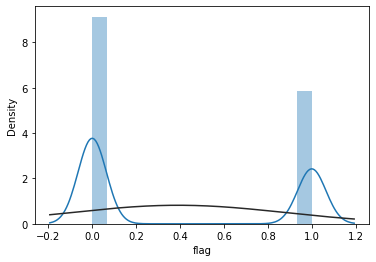

In [899]:
sns.distplot(y_true,fit=st.norm)

In [900]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24994 entries, 0 to 28229
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   注册时间          24994 non-null  float64
 1   注册资本          24994 non-null  float64
 2   行业            24994 non-null  float64
 3   企业类型          24994 non-null  float64
 4   控制人类型         24994 non-null  float64
 5   控制人持股比例       24994 non-null  float64
 6   flag          24994 non-null  float64
 7   知识产权          24994 non-null  float64
 8   融资情况_2015     24994 non-null  float64
 9   融资情况_2016     24994 non-null  float64
 10  融资情况_2017     24994 non-null  float64
 11  从业人数_2015     24994 non-null  float64
 12  资产总额_2015     24994 non-null  float64
 13  负债总额_2015     24994 non-null  float64
 14  主营业务收入_2015   24994 non-null  float64
 15  所有者权益合计_2015  24994 non-null  float64
 16  从业人数_2016     24994 non-null  float64
 17  资产总额_2016     24994 non-null  float64
 18  负债总额_2016     24994 non-nu

In [901]:
X.drop(columns=['flag'],inplace=True)


# 数据切分 查看训练集上的准确度
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_true,test_size=0.4)


#### 随机森林 决策树

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(n_neighbors=3)
# model = LogisticRegressionCV(normalize=True)
knn_clf.fit(X_train,y_train)
# clf.score(X_test,y_test)
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5313062612522504